In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
games = pd.read_csv('vgsales.csv', sep=',')

In [10]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
games['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

Columns chosen to study the correlation: Platform vs Publisher.

Prediction: There could be a correlation because a publisher can have their specialty focussed/trained on one particular platform where they post most of their games. 
    

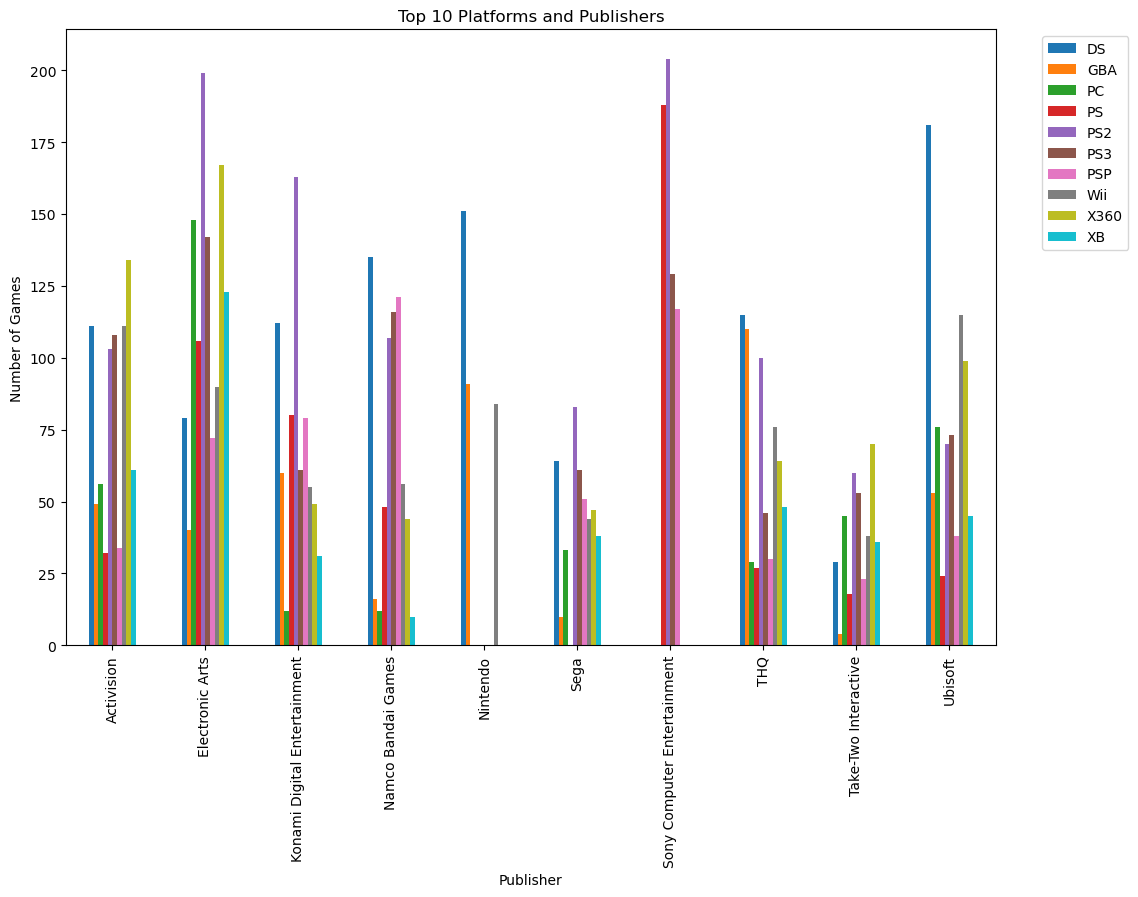

In [13]:
import matplotlib.pyplot as plt

def create_contingency_table(dataset, column1, column2):
    top_platforms = dataset[column1].value_counts().nlargest(10).index
    top_publishers = dataset[column2].value_counts().nlargest(10).index
    dataset = dataset[dataset[column1].isin(top_platforms) & dataset[column2].isin(top_publishers)]
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

contingencyTable = create_contingency_table(games, 'Platform', 'Publisher')

# create bar plot
ax = contingencyTable.plot(kind='bar', figsize=(12, 8))

# add labels and title
ax.set_xlabel('Publisher')
ax.set_ylabel('Number of Games')
ax.set_title('Top 10 Platforms and Publishers')

# adjust legend position
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

# display plot
plt.show()



In [14]:
contingencyTable

Platform,DS,GBA,PC,PS,PS2,PS3,PSP,Wii,X360,XB
Publisher,,,,,,,,,,
Activision,111,49,56,32,103,108,34,111,134,61
Electronic Arts,79,40,148,106,199,142,72,90,167,123
Konami Digital Entertainment,112,60,12,80,163,61,79,55,49,31
Namco Bandai Games,135,16,12,48,107,116,121,56,44,10
Nintendo,151,91,0,0,0,0,0,84,0,0
Sega,64,10,33,0,83,61,51,44,47,38
Sony Computer Entertainment,0,0,0,188,204,129,117,0,0,0
THQ,115,110,29,27,100,46,30,76,64,48
Take-Two Interactive,29,4,45,18,60,53,23,38,70,36


In [15]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [16]:
check_cat_vs_cat_correlation(games, 'Platform','Publisher')

The odds of a correlation between Platform and Publisher is 100.0% (Based on a p value of 0.0).
This percentage needs to be at least 95% for a significant correlation.


The result show that there is an clear correlation between platform and publisher. The correlation is 100% based on this formula.
This is clear when you look at publishers like Sony or nitendo. They have alot of games on very specifik platforms. but 0 on others.